The dataset called ds_salaries.csv while searching for it i made sure it aligns aleast with the problem statement and also the employess are also shown their own salaries wiithin the dataset. ds_salaries provides comprehensive and relevant features such as '', 'company_size' and the 'salary_in_usd', which are critical for finding out whether an employee is likely too withdraw funds from the accessible pot within the 12 months. This is the hyperlink where you can find the dataset (https://www.kaggle.com/datasets/federalreserve/monetary-base-time-series/data).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('C:/Users/User/Downloads/BOGMBASE.csv')

DATA PROCESSING AND CLEANING THE MISSING DATA

In [4]:
df.head()

,realtime_start,realtime_end,date,value
0,2019-12-23,2019-12-23,1959-01-01,50463.0
1,2019-12-23,2019-12-23,1959-02-01,49805.0
2,2019-12-23,2019-12-23,1959-03-01,49733.0
3,2019-12-23,2019-12-23,1959-04-01,50058.0
4,2019-12-23,2019-12-23,1959-05-01,50112.0


In [5]:
 df.size

2924

In [6]:
df.shape

(731, 4)

In [7]:
df.columns

Index(['realtime_start', 'realtime_end', 'date', 'value'], dtype='object')

In [8]:
df.dtypes

realtime_start     object
realtime_end       object
date               object
value             float64
dtype: object

In [9]:
df.describe

<bound method NDFrame.describe of     realtime_start realtime_end        date      value
0       2019-12-23   2019-12-23  1959-01-01    50463.0
1       2019-12-23   2019-12-23  1959-02-01    49805.0
2       2019-12-23   2019-12-23  1959-03-01    49733.0
3       2019-12-23   2019-12-23  1959-04-01    50058.0
4       2019-12-23   2019-12-23  1959-05-01    50112.0
..             ...          ...         ...        ...
726     2019-12-23   2019-12-23  2019-07-01  3260316.0
727     2019-12-23   2019-12-23  2019-08-01  3271378.0
728     2019-12-23   2019-12-23  2019-09-01  3202682.0
729     2019-12-23   2019-12-23  2019-10-01  3252830.0
730     2019-12-23   2019-12-23  2019-11-01  3315572.0

[731 rows x 4 columns]>

In [10]:
df.isnull().sum()

realtime_start    0
realtime_end      0
date              0
value             0
dtype: int64

ARIMA MODEL

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [12]:
df.dtypes

realtime_start     object
realtime_end       object
date               object
value             float64
dtype: object

In [13]:
df['realtime_start'] = pd.to_datetime(df['realtime_start'])
df['realtime_end'] = pd.to_datetime(df['realtime_end'])
df['date'] = pd.to_datetime(df['date'])

In [15]:
value_data = df['value']

Select the 'Value' column as the time series

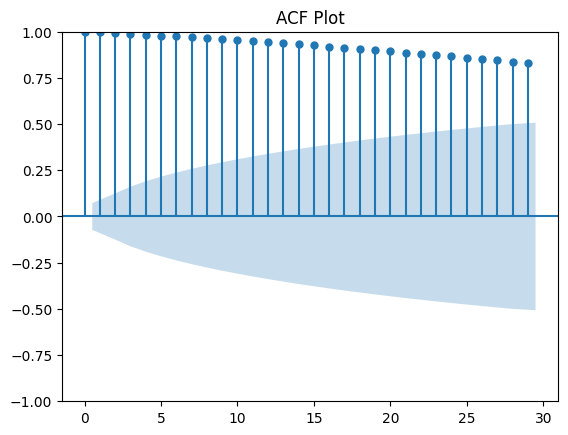

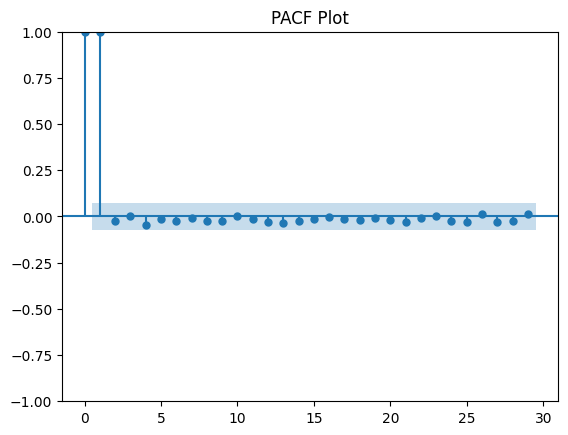

In [17]:
plot_acf(value_data)
plt.title('ACF Plot')
plt.show()
plot_pacf(value_data)
plt.title('PACF Plot')
plt.show()

In [18]:
model = ARIMA(value_data, order=(1, 0, 1)) 

In [19]:
model_fit = model.fit()

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  731
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8621.619
Date:                Thu, 17 Oct 2024   AIC                          17251.238
Time:                        14:48:40   BIC                          17269.615
Sample:                             0   HQIC                         17258.327
                                - 731                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.057e+05   5.07e-12   1.59e+17      0.000    8.06e+05    8.06e+05
ar.L1          0.9996      0.001   1654.428      0.000       0.998       1.001
ma.L1          0.4580      0.011     41.650      0.000       0.436       0.480
sigma2      1.044e+09   7.17e-13   1.46e+21      0.000    1.04e+09    1.04e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):             12244.90
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):            2053.14   Skew:                             1.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.8e+35. Standard errors may be unstable.
"""

In [21]:
forecast = model_fit.forecast(steps=10)
print(forecast)

731    3.325450e+06
732    3.324428e+06
733    3.323406e+06
734    3.322385e+06
735    3.321365e+06
736    3.320344e+06
737    3.319324e+06
738    3.318305e+06
739    3.317286e+06
740    3.316267e+06
Name: predicted_mean, dtype: float64


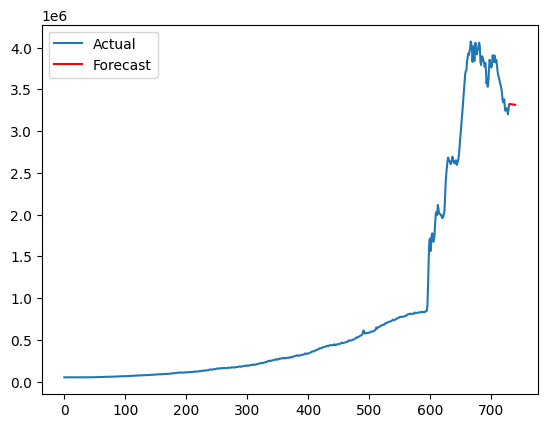

In [23]:
plt.plot(value_data, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()

In [ ]:
Arima model Shows a large inlince

LSTM

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

ImportError: Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 70, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

I have tried fixing my lstm for quite  afew times by reinsttalling tensorflow and even pythonand now i believe the issue lies with the computer its self

In [ ]:
FACEBOOK PROPHET

In [25]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


Right now i dont know what is the issue now i believe its a copatibility problem with the laptop i am using since both tensorflow and prophet gave me issues